In [3]:
from pydataset import data
import pandas as pd

### 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [2]:
mpg = data("mpg")
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

#### * On average, which manufacturer has the best miles per gallon?

In [3]:
mpg.groupby("manufacturer")[['cty', 'hwy']].agg("mean").nlargest(1, ['cty', 'hwy'], keep = "all")

,cty,hwy
manufacturer,,
honda,24.444444,32.555556


### * How many different manufacturers are there?

In [4]:
print(f"There are {len(mpg.groupby('manufacturer'))} manufacturers.")

There are 15 manufacturers.


#### * How many different models are there?

In [5]:
print(f"There are {len(mpg.groupby('model'))} models.")

There are 38 models.


#### * Do automatic or manual cars have better miles per gallon?

In [6]:
def assign_transmission(trans):
    if trans.find("auto") > -1:
        return "auto"
    else:
        return "manual"

mpg['auto_or_manual'] = mpg.trans.apply(assign_transmission)
mpg.groupby('auto_or_manual')[['cty', 'hwy']].agg("mean")

,cty,hwy
auto_or_manual,,
auto,15.968153,22.292994
manual,18.675325,25.779221


### 2. Joining and Merging

In [7]:
import numpy as np
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [8]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [9]:
# Right join would have all the roles whether or not there is a match
pd.merge(users, roles, left_on = "role_id", right_on = "id", how = "right")

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [10]:
# Outer join would return results from both tables whether or not there is a match
pd.merge(users, roles, left_on = "role_id", right_on = "id", how = "outer")

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [11]:
# If you drop the foreign keys you will not be able to join the tables
users.drop(columns = ['role_id'], inplace = True)
roles.drop(columns = ['id'], inplace = True)
pd.merge(users, roles, left_on = "role_id", right_on = "id", how = "inner")

KeyError: 'id'

### 3. Getting data from SQL databases

#### * Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [1]:
def get_db_url(user, host, password, db_name):
    return f"mysql+pymysql://{user}:{password}@{host}/{db_name}"

#### * Use your function to obtain a connection to the employees database.

In [4]:
from env import user, host, password

url = get_db_url(user, host, password, "employees")
query = """
    SELECT *
        FROM employees
            JOIN dept_emp USING(emp_no)
        WHERE to_date > now();
"""

pd.read_sql(query, url)

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,d005,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,d007,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,d004,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,d004,1986-12-01,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,d003,1989-09-12,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,d004,1997-06-02,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,d004,1996-05-13,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,d005,1987-08-30,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,d002,1993-12-27,9999-01-01


#### * Intentionally make a typo in the database url. What kind of error message do you see?

In [ ]:
pd.read_sql(query, url + "typo")

#### * Intentionally make an error in your SQL query. What does the error message look like?

In [ ]:
pd.read_sql(query + "typo", url)

#### * Read the employees and titles tables into two separate dataframes

In [5]:
employees = pd.read_sql(query, url)
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,d005,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,d007,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,d004,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,d004,1986-12-01,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,d003,1989-09-12,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,d004,1997-06-02,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,d004,1996-05-13,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,d005,1987-08-30,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,d002,1993-12-27,9999-01-01


In [6]:
titles = pd.read_sql("SELECT * FROM titles;", url)
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


#### * Visualize the number of employees with each title.

In [16]:
titles.groupby('title').emp_no.agg("count")

title
Assistant Engineer     15128
Engineer              115003
Manager                   24
Senior Engineer        97750
Senior Staff           92853
Staff                 107391
Technique Leader       15159
Name: emp_no, dtype: int64

<AxesSubplot:ylabel='title'>

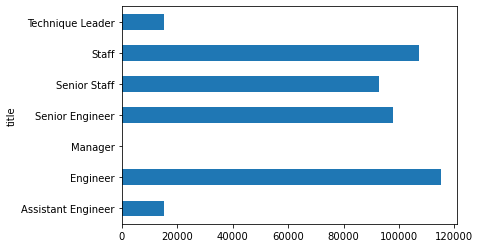

In [17]:
titles.groupby('title').emp_no.agg("count").plot.barh()

#### * Join the employees and titles dataframes together.

In [8]:
emp_and_title = pd.merge(employees, titles, left_on = "emp_no", right_on = "emp_no")

#### * Visualize how frequently employees change titles.

In [33]:
emp_and_title.groupby('emp_no').title.agg("count")

emp_no
10001     1
10002     1
10003     1
10004     2
10005     2
         ..
499995    1
499996    2
499997    2
499998    2
499999    1
Name: title, Length: 240124, dtype: int64

<AxesSubplot:xlabel='emp_no', ylabel='titles held'>

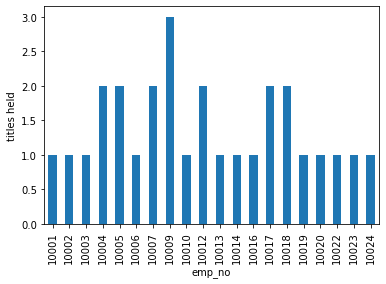

In [26]:
emp_and_title.groupby('emp_no').title.agg("count").head(20).plot.bar(ylabel = "titles held")

#### * For each title, find the hire date of the employee that was hired most recently with that title.

In [29]:
emp_and_title.groupby('title').hire_date.agg("max")

title
Assistant Engineer    1999-12-24
Engineer              2000-01-23
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-15
Name: hire_date, dtype: object

#### * Write the code necessary to create a cross tabulation of the number of titles by department.

In [10]:
dept_query = """SELECT *
                    FROM departments;"""
departments = pd.read_sql(dept_query, url)
emp_title_dept = pd.merge(emp_and_title, departments, left_on = "dept_no", right_on = "dept_no")
emp_title_dept

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date_x,to_date_x,title,from_date_y,to_date_y,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,d005,1986-06-26,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,Development
1,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,d005,1990-08-05,9999-01-01,Senior Engineer,1990-08-05,9999-01-01,Development
2,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,d005,1992-12-18,9999-01-01,Engineer,1992-12-18,2000-12-18,Development
3,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,d005,1992-12-18,9999-01-01,Senior Engineer,2000-12-18,9999-01-01,Development
4,10014,1956-02-12,Berni,Genin,M,1987-03-11,d005,1993-12-29,9999-01-01,Engineer,1993-12-29,9999-01-01,Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371238,499868,1956-11-14,Shaz,Bierbaum,M,1988-11-01,d002,1996-10-03,9999-01-01,Staff,1996-10-03,9999-01-01,Finance
371239,499873,1960-12-10,Kasidit,Picel,F,1986-04-21,d002,1997-08-03,9999-01-01,Staff,1997-08-03,9999-01-01,Finance
371240,499977,1956-06-05,Martial,Weisert,F,1996-09-17,d002,1999-12-28,9999-01-01,Staff,1999-12-28,9999-01-01,Finance
371241,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,d002,1993-12-27,9999-01-01,Senior Staff,1998-12-27,9999-01-01,Finance


In [11]:
pd.crosstab(emp_title_dept.title, emp_title_dept.dept_name)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,240,5551,0,0,0,4670,1280,316,0
Engineer,1927,42111,0,0,0,36308,10174,2416,0
Manager,4,2,2,2,2,4,4,2,2
Senior Engineer,1790,38816,0,0,0,33627,9459,2250,0
Senior Staff,11271,1085,9546,9825,11291,1123,0,9093,28797
Staff,11836,1123,9995,10407,11885,1185,0,9646,30117
Technique Leader,241,5478,0,0,0,4724,1295,321,0


### 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [13]:
chipotle_url = get_db_url(user, host, password, "chipotle")
chipotle_query = """SELECT *
                        FROM orders"""

chipotle = pd.read_sql(chipotle_query, chipotle_url)
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


#### * What is the total price for each order?

In [33]:
def convert_to_float(price):
    price = price.replace("$", "")
    return float(price)

chipotle['float_price'] = chipotle.item_price.apply(convert_to_float)
chipotle.groupby('order_id').float_price.agg("sum")

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: float_price, Length: 1834, dtype: float64

#### * What are the most popular 3 items?

In [37]:
chipotle.groupby('item_name')[['quantity']].agg("count").sort_values(ascending = False).head(3)

TypeError: sort_values() missing 1 required positional argument: 'by'

#### * Which item has produced the most revenue?

In [39]:
chipotle.groupby('item_name').float_price.agg("sum").sort_values(ascending = False).head(1)

item_name
Chicken Bowl    7342.73
Name: float_price, dtype: float64